In [73]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file1=files.upload()

Saving ABC Company.xlsx to ABC Company.xlsx


In [116]:
abc_df=pd.read_excel('ABC Company.xlsx')
print(abc_df)

              Name            Team  Number Position  Age               Height  \
0    Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1      Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2     John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3      R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4    Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   
..             ...             ...     ...      ...  ...                  ...   
453   Shelvin Mack       Utah Jazz       8       PG   26  2023-03-06 00:00:00   
454      Raul Neto       Utah Jazz      25       PG   24  2023-01-06 00:00:00   
455   Tibor Pleiss       Utah Jazz      21        C   26  2023-03-07 00:00:00   
456    Jeff Withey       Utah Jazz      24        C   26                  7-0   
457       Priyanka       Utah Jazz      34        C   25  2023-03-07 00:00:00   

     Weight            Coll

**Preprocessing:**

---


 **Correct the data in the "height" column by replacing it with random
numbers between 150 and 180. Ensure data consistency and integrity
before proceeding with analysis.**

In [117]:
size=abc_df.shape
print(size)

(458, 9)


In [118]:
columns=abc_df.columns
print(columns)

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')


In [119]:
abc_df.isna().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,11


In [120]:
abc_df['Height']

,Height
0,2023-02-06 00:00:00
1,2023-06-06 00:00:00
2,2023-05-06 00:00:00
3,2023-05-06 00:00:00
4,2023-10-06 00:00:00
...,...
453,2023-03-06 00:00:00
454,2023-01-06 00:00:00
455,2023-03-07 00:00:00
456,7-0


In [121]:
height=np.random.randint(150,181,size=len(abc_df))
abc_df['Height']=height
abc_df['Height']

,Height
0,172
1,158
2,165
3,153
4,176
...,...
453,173
454,177
455,158
456,167


**Analysis Tasks:**

---


 **Determine the distribution of employees across each team and calculate
the percentage split relative to the total number of employees.**


In [122]:
team_count=abc_df['Team'].value_counts()
Total_Employees=len(abc_df)
team_percentage=(team_count/Total_Employees)*100
team_distribution=pd.DataFrame({ 'Employee_Count': team_count,
    'Percentage_Split': team_percentage.round(2)})
print(team_distribution)

                        Employee_Count  Percentage_Split
Team                                                    
New Orleans Pelicans                19              4.15
Memphis Grizzlies                   18              3.93
Utah Jazz                           16              3.49
Milwaukee Bucks                     16              3.49
New York Knicks                     16              3.49
Boston Celtics                      15              3.28
Los Angeles Clippers                15              3.28
Los Angeles Lakers                  15              3.28
Phoenix Suns                        15              3.28
Sacramento Kings                    15              3.28
Brooklyn Nets                       15              3.28
Philadelphia 76ers                  15              3.28
Toronto Raptors                     15              3.28
Golden State Warriors               15              3.28
Indiana Pacers                      15              3.28
Detroit Pistons                

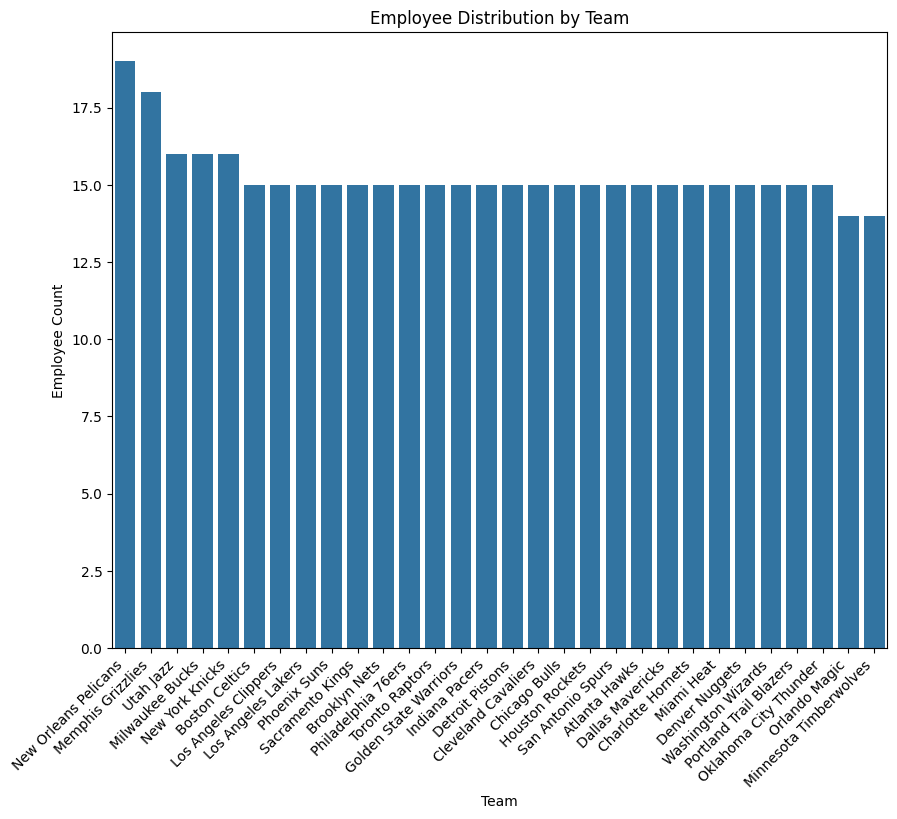

In [123]:
plt.figure(figsize=(10,8))
sns.barplot(x=team_distribution.index,y=team_distribution['Employee_Count'])
plt.xlabel('Team')
plt.ylabel('Employee Count')
plt.title('Employee Distribution by Team')
plt.xticks(rotation=45, ha='right')
plt.show()

From this graphical visualization, we can see that the New Orleans Pelicans and Memphis Grizzlies have the highest number of employees, with only a slight difference. Most of the other teams have nearly the same number of employees. The percentage distribution further confirms that, except for the top two teams, all teams have an almost equal allocation of employees.

**Segregate employees based on their positions within the company.**


In [124]:
abc_df['Position'].value_counts()

,count
Position,
SG,102
PF,100
PG,92
SF,85
C,79


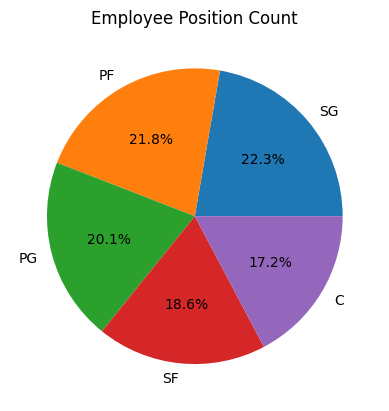

In [125]:
plt.pie(abc_df['Position'].value_counts(),labels=abc_df['Position'].value_counts().index,autopct='%1.1f%%')
plt.title('Employee Position Count')
plt.show()

From the above graphical representation, it is clear that employee distribution across all positions is fairly even, with only slight variations. Among all positions, the SG position has the highest number of employees.

**Identify the predominant age group among employees.**

In [126]:
bins=[10,20,30,40]
labels=['10-20','20-30','30-40']
abc_df['Age_Group']=pd.cut(abc_df['Age'],bins=bins,labels=labels,right=False)
age_group_counts=abc_df['Age_Group'].value_counts()
predominant_age_group = age_group_counts.idxmax()
print(age_group_counts)
print("\nPredominant Age Group:", predominant_age_group)

Age_Group
20-30    334
30-40    119
10-20      2
Name: count, dtype: int64

Predominant Age Group: 20-30


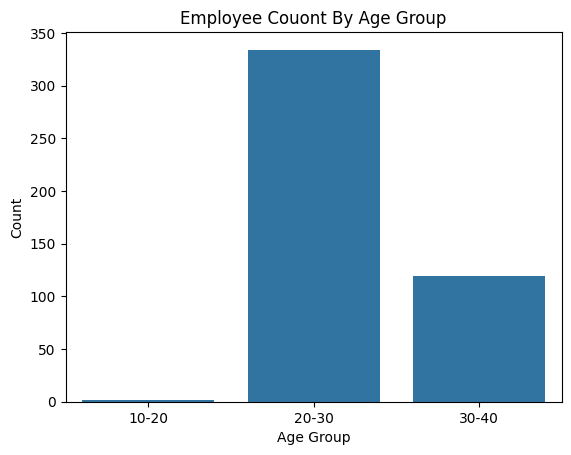

In [127]:
sns.barplot(x=age_group_counts.index,y=age_group_counts)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Employee Couont By Age Group')
plt.show()

From the above visualization, we can see that most employees are in the 20-30 age group (middle-aged), while the 10-20 age group has the least number of employees.

**Discover which team and position have the highest salary expenditure.**

In [128]:
salary_expenditure=abc_df.groupby(['Team','Position'])['Salary'].sum()
print(salary_expenditure)

Team                Position
Atlanta Hawks       C           22756250.0
                    PF          23952268.0
                    PG           9763400.0
                    SF           6000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C           24490429.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 149, dtype: float64


In [129]:
highest_position = salary_expenditure.idxmax()
highest_position

('Los Angeles Lakers', 'SF')

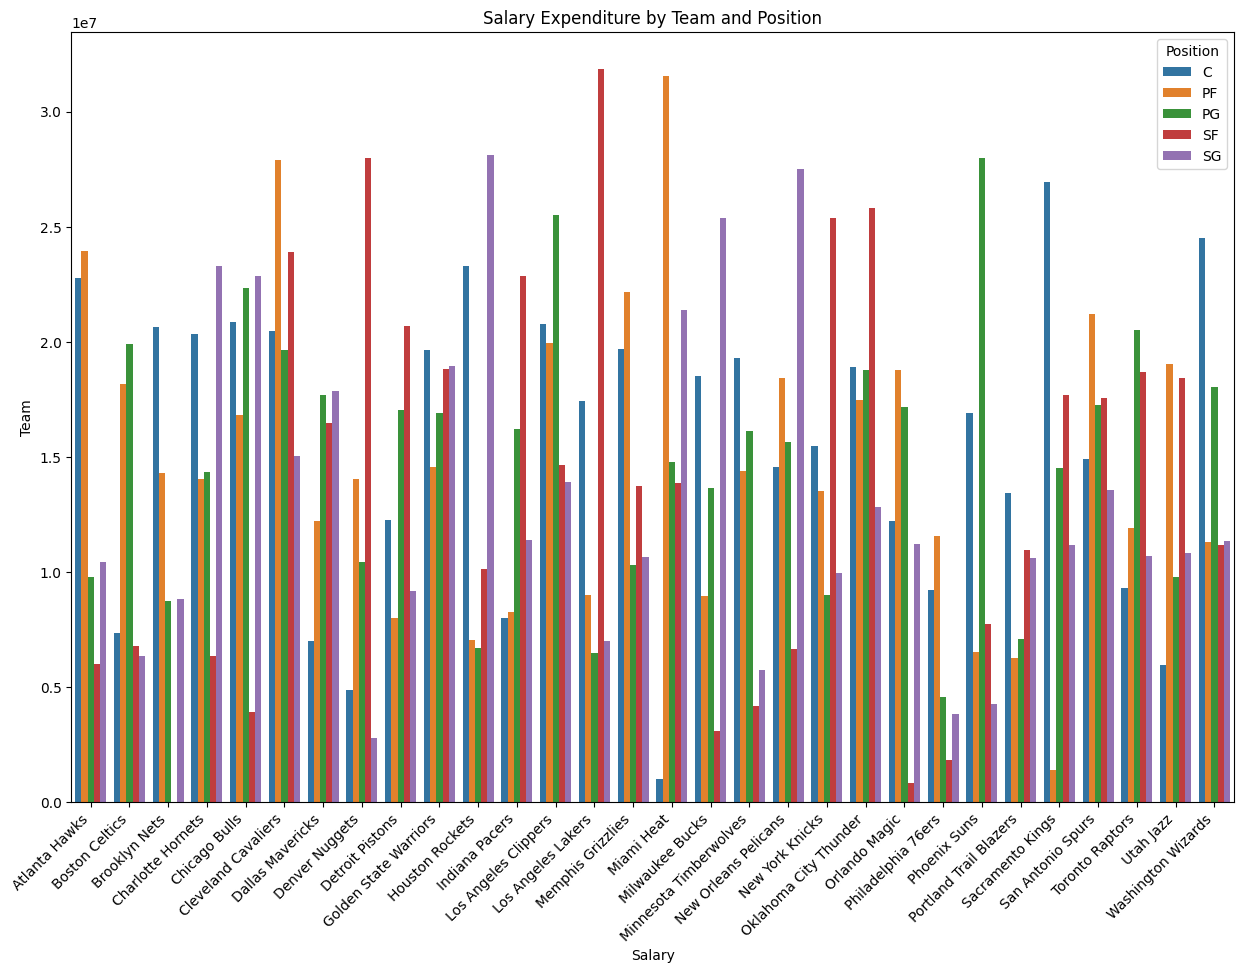

In [147]:
salary = pd.DataFrame(salary_expenditure)

plt.figure(figsize=(15,10))
sns.barplot(x='Team', y='Salary', hue='Position', data=salary)
plt.xlabel('Salary')
plt.ylabel('Team')
plt.title('Salary Expenditure by Team and Position')
plt.xticks(rotation=45, ha='right')
plt.show()

From here we can identify that highest salary is for the position SF in team Los Angeles Lakers.

 **Investigate if there's any correlation between age and salary, and
represent it visually.**

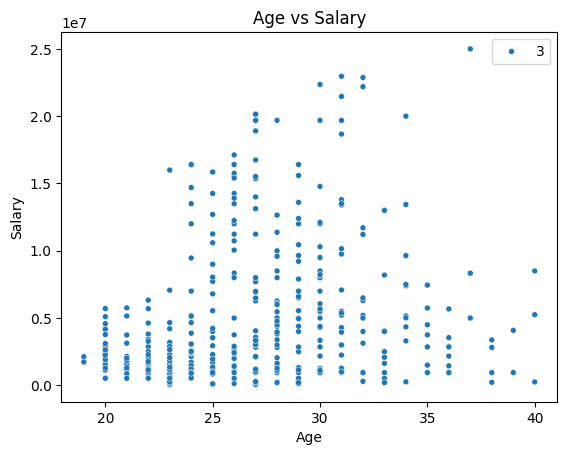

In [82]:
sns.scatterplot(x='Age', y='Salary', data=abc_df,size=3)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

This graphical representation shows that , there is a modarate relationship between age and salary.This means that, middle-aged employees tend to have higher salaries compared to younger employees.